In [7]:
# Read in the data
import pandas as pd

# Read in the CSV files
iemocap1 = pd.read_csv('iemocap_session1_af.csv')
iemocap2 = pd.read_csv('iemocap_session2_af.csv')
iemocap3 = pd.read_csv('iemocap_session3_af.csv')
iemocap4 = pd.read_csv('iemocap_session4_af.csv')
iemocap5 = pd.read_csv('iemocap_session5_af.csv')

In [8]:
# Get the DA labels
da_labels_iemocap1 = iemocap1['DA']
da_labels_iemocap2 = iemocap2['DA']
da_labels_iemocap3 = iemocap3['DA']
da_labels_iemocap4 = iemocap4['DA']
da_labels_iemocap5 = iemocap5['DA']

# Emotion labels
emot_labels_iemocap1 = iemocap1['EMOTION']
emot_labels_iemocap2 = iemocap2['EMOTION']
emot_labels_iemocap3 = iemocap3['EMOTION']
emot_labels_iemocap4 = iemocap4['EMOTION']
emot_labels_iemocap5 = iemocap5['EMOTION']

In [10]:
# CREATE THE 5 SPLITS OF LABELS
## SPLIT 1
# Split 1 DA Labels
train_split_1_da_labels = pd.concat([da_labels_iemocap1, da_labels_iemocap2, da_labels_iemocap3])
valid_split_1_da_labels = da_labels_iemocap4
test_split_1_da_labels = da_labels_iemocap5

# Split 1 ER Labels
train_split_1_er_labels = pd.concat([emot_labels_iemocap1, emot_labels_iemocap2, emot_labels_iemocap3])
valid_split_1_er_labels = pd.concat([emot_labels_iemocap4])
test_split_1_er_labels = pd.concat([emot_labels_iemocap5])

## SPLIT 2
# Split 2 DA Labels
train_split_2_da_labels = pd.concat([da_labels_iemocap2, da_labels_iemocap3, da_labels_iemocap4])
valid_split_2_da_labels = da_labels_iemocap5
test_split_2_da_labels = da_labels_iemocap1

# Split 2 ER Labels
train_split_2_er_labels = pd.concat([emot_labels_iemocap2, emot_labels_iemocap3, emot_labels_iemocap4])
valid_split_2_er_labels = pd.concat([emot_labels_iemocap5])
test_split_2_er_labels = pd.concat([emot_labels_iemocap1])

## SPLIT 3
# Split 3 DA Labels
train_split_3_da_labels = pd.concat([da_labels_iemocap3, da_labels_iemocap4, da_labels_iemocap5])
valid_split_3_da_labels = da_labels_iemocap1
test_split_3_da_labels = da_labels_iemocap2

# Split 3 ER Labels
train_split_3_er_labels = pd.concat([emot_labels_iemocap3, emot_labels_iemocap4, emot_labels_iemocap5])
valid_split_3_er_labels = pd.concat([emot_labels_iemocap1])
test_split_3_er_labels = pd.concat([emot_labels_iemocap2])


## SPLIT 4
# Split 4 DA Labels
train_split_4_da_labels = pd.concat([da_labels_iemocap4, da_labels_iemocap5, da_labels_iemocap1])
valid_split_4_da_labels = da_labels_iemocap2
test_split_4_da_labels = da_labels_iemocap3

# Split 4 ER Labels
train_split_4_er_labels = pd.concat([emot_labels_iemocap4, emot_labels_iemocap5, emot_labels_iemocap1])
valid_split_4_er_labels = pd.concat([emot_labels_iemocap2])
test_split_4_er_labels = pd.concat([emot_labels_iemocap3])

## SPLIT 5
# Split 5 DA Labels
train_split_5_da_labels = pd.concat([da_labels_iemocap5, da_labels_iemocap1, da_labels_iemocap2])
valid_split_5_da_labels = da_labels_iemocap3
test_split_5_da_labels = da_labels_iemocap4

# Split 5 ER Labels
train_split_5_er_labels = pd.concat([emot_labels_iemocap5, emot_labels_iemocap1, emot_labels_iemocap2])
valid_split_5_er_labels = pd.concat([emot_labels_iemocap3])
test_split_5_er_labels = pd.concat([emot_labels_iemocap4])

In [11]:
# Load Bert encodings
import numpy as np
iemocap_prefix = "iemocap_"
bert_embedding_prefix = "bert_embedding_300_"


iemocap1_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "1.pickle", allow_pickle=True))
iemocap2_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "2.pickle", allow_pickle=True))
iemocap3_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "3.pickle", allow_pickle=True))
iemocap4_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "4.pickle", allow_pickle=True))
iemocap5_bert_features = np.array(np.load(bert_embedding_prefix + iemocap_prefix + "5.pickle", allow_pickle=True))

print(iemocap1_bert_features.shape)
print(iemocap2_bert_features.shape)
print(iemocap3_bert_features.shape)
print(iemocap4_bert_features.shape)
print(iemocap5_bert_features.shape)

(1819, 300)
(1762, 300)
(1760, 300)
(1865, 300)
(2170, 300)


In [12]:
import numpy as np

# Split 1 Unimodal BERT
unimodal_bert_train_split_1 = np.concatenate([iemocap1_bert_features, iemocap2_bert_features, iemocap3_bert_features], axis=0)
unimodal_bert_valid_split_1 = iemocap4_bert_features
unimodal_bert_test_split_1 = iemocap5_bert_features
    
# Split 2 Unimodal BERT
unimodal_bert_train_split_2 = np.concatenate([iemocap2_bert_features, iemocap3_bert_features, iemocap4_bert_features], axis=0)
unimodal_bert_valid_split_2 = iemocap5_bert_features
unimodal_bert_test_split_2 = iemocap1_bert_features

# Split 3 Unimodal BERT
unimodal_bert_train_split_3 = np.concatenate([iemocap3_bert_features, iemocap4_bert_features, iemocap5_bert_features], axis=0)
unimodal_bert_valid_split_3 = iemocap1_bert_features
unimodal_bert_test_split_3 = iemocap2_bert_features

# Split 4 Unimodal BERT
unimodal_bert_train_split_4 = np.concatenate([iemocap4_bert_features, iemocap5_bert_features, iemocap1_bert_features], axis=0)
unimodal_bert_valid_split_4 = iemocap2_bert_features
unimodal_bert_test_split_4 = iemocap3_bert_features

# Split 5 Unimodal BERT
unimodal_bert_train_split_5 = np.concatenate([iemocap5_bert_features, iemocap1_bert_features, iemocap2_bert_features], axis=0)
unimodal_bert_valid_split_5 = iemocap3_bert_features
unimodal_bert_test_split_5 = iemocap4_bert_features

In [13]:
# Read in acoustic features
acoustic_feat_df = pd.read_csv('acoustic_embeddings.csv')
acoustic_feat_df

,Unnamed: 0,audio_file,acoustic_embedding
0,0,Ses05F_impro01_F000,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1,1,Ses05F_impro01_M000,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2,2,Ses05F_impro01_F001,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
3,3,Ses05F_impro01_M001,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4,4,Ses05F_impro01_F002,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
...,...,...,...
9371,1814,Ses01M_script03_2_F040,[0. 0. 0. 0. 0...
9372,1815,Ses01M_script03_2_M041,[0. 0. 0. 0. 0...
9373,1816,Ses01M_script03_2_F041,[0. 0. 0. 0. 0...
9374,1817,Ses01M_script03_2_M042,[0. 0. 0. 0. 0...


In [14]:
def get_numpy_embeddings_from_str_vectors(df):
    res = []
    for r in df.iterrows():
        str_rep = r[1]['acoustic_embedding'].replace('\n','').replace('[','').replace(']','').split()
        vec = [float(x) for x in str_rep]
        res.append(np.array(vec))
    return np.array(res)

In [47]:
iemocap1_merged = iemocap1.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file')
iemocap2_merged = iemocap2.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file')
iemocap3_merged = iemocap3.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file')
iemocap4_merged = iemocap4.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file')
iemocap5_merged = iemocap5.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file')

In [50]:
# CREATE OUR 5 TRAIN DATA SPLITS
train_split_1 = pd.concat([iemocap1_merged, iemocap2_merged, iemocap3_merged])
train_split_2 = pd.concat([iemocap2_merged, iemocap3_merged, iemocap4_merged])
train_split_3 = pd.concat([iemocap3_merged, iemocap4_merged, iemocap5_merged])
train_split_4 = pd.concat([iemocap4_merged, iemocap5_merged, iemocap1_merged])
train_split_5 = pd.concat([iemocap5_merged, iemocap1_merged, iemocap2_merged])

valid_split_1 = iemocap4_merged
test_split_1 = iemocap5_merged

valid_split_2 = iemocap5_merged
test_split_2 = iemocap1_merged

valid_split_3 = iemocap1_merged
test_split_3 = iemocap2_merged

valid_split_4 = iemocap2_merged
test_split_4 = iemocap3_merged

valid_split_5 = iemocap3_merged
test_split_5 = iemocap4_merged

In [51]:
len(train_split_1)

5341

In [15]:
acoustic_feat_iemocap1 = get_numpy_embeddings_from_str_vectors(iemocap1.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap2 = get_numpy_embeddings_from_str_vectors(iemocap2.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap3 = get_numpy_embeddings_from_str_vectors(iemocap3.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap4 = get_numpy_embeddings_from_str_vectors(iemocap4.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))
acoustic_feat_iemocap5 = get_numpy_embeddings_from_str_vectors(iemocap5.merge(acoustic_feat_df, how='inner', left_on='TURN', right_on='audio_file'))

In [16]:
acoustic_feat_iemocap1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.813972  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.3523436 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14972006]])

In [17]:
import numpy as np

# Split 1 ACOUSTIC
acoustic_train_split_1 = np.concatenate([acoustic_feat_iemocap1, acoustic_feat_iemocap2, acoustic_feat_iemocap3], axis=0)
acoustic_valid_split_1 = acoustic_feat_iemocap4
acoustic_test_split_1 = acoustic_feat_iemocap5
    
# Split 2 ACOUSTIC
acoustic_train_split_2 = np.concatenate([acoustic_feat_iemocap2, acoustic_feat_iemocap3, acoustic_feat_iemocap4], axis=0)
acoustic_valid_split_2 = acoustic_feat_iemocap5
acoustic_test_split_2 = acoustic_feat_iemocap1

# Split 3 ACOUSTIC
acoustic_train_split_3 = np.concatenate([acoustic_feat_iemocap3, acoustic_feat_iemocap4, acoustic_feat_iemocap5], axis=0)
acoustic_valid_split_3 = acoustic_feat_iemocap1
acoustic_test_split_3 = acoustic_feat_iemocap2

# Split 4 ACOUSTIC
acoustic_train_split_4 = np.concatenate([acoustic_feat_iemocap4, acoustic_feat_iemocap5, acoustic_feat_iemocap1], axis=0)
acoustic_valid_split_4 = acoustic_feat_iemocap2
acoustic_test_split_4 = acoustic_feat_iemocap3

# Split 5 ACOUSTIC
acoustic_train_split_5 = np.concatenate([acoustic_feat_iemocap5, acoustic_feat_iemocap1, acoustic_feat_iemocap2], axis=0)
acoustic_valid_split_5 = acoustic_feat_iemocap3
acoustic_test_split_5 = acoustic_feat_iemocap4

# FULL LISTS
acoustic_train_splits = [acoustic_train_split_1, acoustic_train_split_2, acoustic_train_split_3, acoustic_train_split_4, acoustic_train_split_5]
acoustic_valid_splits = [acoustic_valid_split_1, acoustic_valid_split_2, acoustic_valid_split_3, acoustic_valid_split_4, acoustic_valid_split_5]
acoustic_test_splits = [acoustic_test_split_1, acoustic_test_split_2, acoustic_test_split_3, acoustic_test_split_4, acoustic_test_split_5]


In [18]:
unimodal_bert_train_split_1

array([[ 0.13593218,  0.25189534, -0.09371963, ...,  0.01768046,
        -0.1180291 , -0.29474685],
       [ 0.29623467,  0.13712762,  0.19851115, ...,  0.29339835,
         0.12679285,  0.07483217],
       [-0.32706037, -0.01159372, -0.0164483 , ..., -0.02444044,
        -0.04489856, -0.11471435],
       ...,
       [ 0.27807465,  0.13579798, -0.09710051, ...,  0.13515592,
         0.1549896 , -0.09676376],
       [-0.4587921 ,  0.13971102, -0.04750163, ...,  0.07599118,
         0.40137768, -0.08336773],
       [-0.2814192 ,  0.18770644, -0.06917511, ...,  0.05936834,
        -0.2707988 ,  0.2492704 ]], dtype=float32)

In [19]:
# Load Glove Embeddings
from glove_embeddings import *

# Load individual iemocap glove embeddings
iemocap1_glove = load_glove_embedding_matrix('glove_embedding_iemocap_1.pickle')
iemocap2_glove = load_glove_embedding_matrix('glove_embedding_iemocap_2.pickle')
iemocap3_glove = load_glove_embedding_matrix('glove_embedding_iemocap_3.pickle')
iemocap4_glove = load_glove_embedding_matrix('glove_embedding_iemocap_4.pickle')
iemocap5_glove = load_glove_embedding_matrix('glove_embedding_iemocap_5.pickle')

# Load combined glove embeddings
iemocap_train_split_1_glove = load_glove_embedding_matrix('glove_embedding_iemocap_split_1.pickle')
iemocap_train_split_2_glove = load_glove_embedding_matrix('glove_embedding_iemocap_split_2.pickle')
iemocap_train_split_3_glove = load_glove_embedding_matrix('glove_embedding_iemocap_split_3.pickle')
iemocap_train_split_4_glove = load_glove_embedding_matrix('glove_embedding_iemocap_split_4.pickle')
iemocap_train_split_5_glove = load_glove_embedding_matrix('glove_embedding_iemocap_split_5.pickle')

In [57]:
from keras import Sequential
from keras.layers import Dense, Flatten

def create_glove_embedded_vectors_for_split(embedding_matrix, train_split, valid_split, test_split):
    vectorizer = create_text_vectorizer_for_train_samples(train_split)
    num_tokens_voc = len(vectorizer.get_vocabulary())
    x_train = vectorizer(np.array([[s] for s in train_split['UTTERANCE']])).numpy()
    x_valid = vectorizer(np.array([[s] for s in valid_split['UTTERANCE']])).numpy()
    x_test = vectorizer(np.array([[s] for s in test_split['UTTERANCE']])).numpy()
            
    embedding_model = Sequential()
    embedding_layer = create_glove_embedding_layer_for_matrix(embedding_matrix, num_tokens_voc)
    embedding_model.add(embedding_layer)
    embedding_model.add(Flatten())
    
    x_train_vectors = embedding_model.predict(x_train)
    x_valid_vectors = embedding_model.predict(x_valid)
    x_test_vectors = embedding_model.predict(x_test)
    
    return x_train_vectors, x_valid_vectors, x_test_vectors

glove_train_embedding_matrices = [iemocap_train_split_1_glove, iemocap_train_split_2_glove, iemocap_train_split_3_glove, iemocap_train_split_4_glove, iemocap_train_split_5_glove]
x_train_list= [train_split_1, train_split_2, train_split_3, train_split_4, train_split_5]
x_valid_list = [valid_split_1, valid_split_2, valid_split_3, valid_split_4, valid_split_5]
x_test_list = [test_split_1, test_split_2, test_split_3, test_split_4, test_split_5]

glove_train_features = []
glove_valid_features = []
glove_test_features = []
    
for i in range(5):
    print(f"Creating glove features for split {i}")
    
    embedding_matrix = glove_train_embedding_matrices[i]
    train_split = x_train_list[i]
    print(len(train_split))
    valid_split = x_valid_list[i]
    test_split = x_test_list[i]
    
    x_train_vectors, x_valid_vectors, x_test_vectors = create_glove_embedded_vectors_for_split(embedding_matrix, train_split, valid_split, test_split)
    glove_train_features.append(x_train_vectors)
    glove_valid_features.append(x_valid_vectors)
    glove_test_features.append(x_test_vectors)
    

Creating glove features for split 0
5341
Creating glove features for split 1
5387
Creating glove features for split 2
5795
Creating glove features for split 3
5854
Creating glove features for split 4
5751


In [58]:
print(len(glove_train_features[0]))
print(len(glove_train_features[1]))

5341
5387


In [68]:
# Train feature list
bert_train_features = [unimodal_bert_train_split_1,unimodal_bert_train_split_2, unimodal_bert_train_split_3, unimodal_bert_train_split_4, unimodal_bert_train_split_5]

# Valid feature list
bert_valid_features = [unimodal_bert_valid_split_1, unimodal_bert_valid_split_2, unimodal_bert_valid_split_3, unimodal_bert_valid_split_4, unimodal_bert_valid_split_5]

# Test feature list
bert_test_features = [unimodal_bert_test_split_1, unimodal_bert_test_split_2, unimodal_bert_test_split_3, unimodal_bert_test_split_4, unimodal_bert_test_split_5]

In [69]:
from keras import layers, Input, Model, Sequential
from keras.callbacks import EarlyStopping
import tensorflow as tf

def train_multi_modal_lstm(x_train_text_feat, x_train_acous_feat, x_valid_text_feat, x_valid_acous_feat, 
                          y_train, y_valid):
    # Step 1 Merge acoustic and text features
    x_train_combined = np.concatenate([x_train_text_feat, x_train_acous_feat], axis=1)
    x_valid_combined = np.concatenate([x_valid_text_feat, x_valid_acous_feat], axis=1)
    num_dims = x_train_combined.shape[1]
    print(num_dims)
    
    # Step 2 Reshape for tensors
    x_train_combined = x_train_combined.reshape(-1, 1, num_dims)
    x_valid_combined = x_valid_combined.reshape(-1, 1, num_dims)
    
    # Step 3 Create Train and Valid Dataset objects
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train_combined, y_train)).batch(128)
    valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid_combined, y_valid)).batch(128)
    
    # Step 4 Create the LSTM
    #callback = EarlyStopping(monitor='val_loss', patience=3)
    
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(1,num_dims)))
    model.add(layers.Bidirectional(layers.LSTM(20, return_sequences=True)))
    model.add(layers.Bidirectional(layers.LSTM(20)))
    
    model.add(layers.Dense(y_train.shape[1], activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])
    #model.fit(train_dataset, batch_size=128, epochs=100, validation_data=valid_dataset,
     #             callbacks=[callback])
    model.fit(train_dataset, batch_size=128, epochs=15, validation_data=valid_dataset)
    return model
    

In [60]:
from data_preprocess import *

y_train = convert_da_labels_to_categorical(train_split_1_da_labels)
y_valid =  convert_da_labels_to_categorical(valid_split_1_da_labels)

train_multi_modal_lstm(glove_train_features[0], acoustic_train_split_1, glove_valid_features[0], acoustic_valid_split_1, 
                          y_train, y_valid)

90128
Epoch 1/100
42/42 [==============================] - 15s 230ms/step - loss: 2.0861 - acc: 0.2456 - val_loss: 1.8611 - val_acc: 0.3292
Epoch 2/100
42/42 [==============================] - 8s 198ms/step - loss: 1.7646 - acc: 0.4031 - val_loss: 1.6684 - val_acc: 0.4466
Epoch 3/100
42/42 [==============================] - 8s 185ms/step - loss: 1.4784 - acc: 0.5387 - val_loss: 1.5095 - val_acc: 0.4826
Epoch 4/100
42/42 [==============================] - 8s 181ms/step - loss: 1.1856 - acc: 0.6364 - val_loss: 1.4474 - val_acc: 0.5040
Epoch 5/100
42/42 [==============================] - 7s 178ms/step - loss: 0.9575 - acc: 0.7255 - val_loss: 1.4510 - val_acc: 0.5244
Epoch 6/100
42/42 [==============================] - 7s 178ms/step - loss: 0.7954 - acc: 0.7813 - val_loss: 1.4499 - val_acc: 0.5410
Epoch 7/100
42/42 [==============================] - 7s 178ms/step - loss: 0.6791 - acc: 0.8184 - val_loss: 1.4978 - val_acc: 0.5416


In [ ]:
from data_preprocess import *

y_train = convert_da_labels_to_categorical(train_split_1_da_labels)
y_valid =  convert_da_labels_to_categorical(valid_split_1_da_labels)

train_multi_modal_lstm(unimodal_bert_train_split_1, acoustic_train_split_1, unimodal_bert_valid_split_1, acoustic_valid_split_1, 
                          y_train, y_valid)

In [70]:
from data_preprocess import *
import numpy as np

train_split_da_labels = [train_split_1_da_labels, train_split_2_da_labels, train_split_3_da_labels, train_split_4_da_labels, train_split_5_da_labels]
valid_split_da_labels = [valid_split_1_da_labels, valid_split_2_da_labels, valid_split_3_da_labels, valid_split_4_da_labels, valid_split_5_da_labels]
x_train_list= [train_split_1, train_split_2, train_split_3, train_split_4, train_split_5]
x_valid_list = [valid_split_1, valid_split_2, valid_split_3, valid_split_4, valid_split_5]
x_test_list = [test_split_1, test_split_2, test_split_3, test_split_4, test_split_5]
def train_five_multimodal_models(text_feat_type):
    print(f"Training models with {text_feat_type} text features and acoustic features")
    # Pick text features set
    text_train_feat_list = []
    text_valid_feat_list = []
    if text_feat_type == 'BERT':
        text_train_feat_list = bert_train_features
        text_valid_feat_list = bert_valid_features
    elif text_feat_type == 'GLOVE':
        text_train_feat_list = glove_train_features
        text_valid_feat_list = glove_valid_features
    else:
        raise ValueError(f"Incorrect text feature type {text_feat_type}")
    
    train_size = len(text_train_feat_list)
    valid_size = len(text_valid_feat_list)
    
    # Train 5 models
    mm_models_list = []
    
    for i in range(5):
        x_train_text_feat = text_train_feat_list[i]
        x_valid_text_feat = text_valid_feat_list[i]
        train_split = x_train_list[i]
        valid_split = x_valid_list[i]
        
        x_train_acous_feat = acoustic_train_splits[i]
        x_valid_acous_feat = acoustic_valid_splits[i]
        
        # Convert DA labels to categorical values
        train_labels = train_split_da_labels[i]
        valid_labels = valid_split_da_labels[i]
        
        y_train = convert_da_labels_to_categorical(train_labels)
        y_valid =  convert_da_labels_to_categorical(valid_labels)
        
        print(f"Training model {i}") 
        model = train_multi_modal_lstm(x_train_text_feat, x_train_acous_feat, x_valid_text_feat, x_valid_acous_feat, 
                              y_train, y_valid)
        mm_models_list.append(model)
    
    return mm_models_list
        

In [71]:
bert_model_list = train_five_multimodal_models('BERT')

Training models with BERT text features and acoustic features
Training model 0
428
Epoch 1/15
42/42 [==============================] - 13s 79ms/step - loss: 2.1804 - acc: 0.2309 - val_loss: 1.9018 - val_acc: 0.2547
Epoch 2/15
42/42 [==============================] - 0s 7ms/step - loss: 1.8186 - acc: 0.4046 - val_loss: 1.6954 - val_acc: 0.3930
Epoch 3/15
42/42 [==============================] - 0s 10ms/step - loss: 1.5284 - acc: 0.4705 - val_loss: 1.5560 - val_acc: 0.4450
Epoch 4/15
42/42 [==============================] - 0s 8ms/step - loss: 1.3856 - acc: 0.5199 - val_loss: 1.4835 - val_acc: 0.4681
Epoch 5/15
42/42 [==============================] - 0s 9ms/step - loss: 1.2938 - acc: 0.5478 - val_loss: 1.4554 - val_acc: 0.4627
Epoch 6/15
42/42 [==============================] - 0s 8ms/step - loss: 1.2286 - acc: 0.5724 - val_loss: 1.4501 - val_acc: 0.4633
Epoch 7/15
42/42 [==============================] - 0s 7ms/step - loss: 1.1776 - acc: 0.5902 - val_loss: 1.4322 - val_acc: 0.4713
Epoc

45/45 [==============================] - 0s 7ms/step - loss: 1.8290 - acc: 0.4279 - val_loss: 1.6743 - val_acc: 0.4608
Epoch 3/15
45/45 [==============================] - 0s 9ms/step - loss: 1.5278 - acc: 0.4843 - val_loss: 1.4439 - val_acc: 0.5085
Epoch 4/15
45/45 [==============================] - 0s 7ms/step - loss: 1.3712 - acc: 0.5190 - val_loss: 1.3497 - val_acc: 0.5256
Epoch 5/15
45/45 [==============================] - 0s 9ms/step - loss: 1.2834 - acc: 0.5448 - val_loss: 1.2889 - val_acc: 0.5472
Epoch 6/15
45/45 [==============================] - 0s 7ms/step - loss: 1.2179 - acc: 0.5785 - val_loss: 1.2514 - val_acc: 0.5676
Epoch 7/15
45/45 [==============================] - 0s 7ms/step - loss: 1.1663 - acc: 0.5957 - val_loss: 1.2263 - val_acc: 0.5761
Epoch 8/15
45/45 [==============================] - 0s 9ms/step - loss: 1.1298 - acc: 0.6084 - val_loss: 1.2214 - val_acc: 0.5750
Epoch 9/15
45/45 [==============================] - 0s 8ms/step - loss: 1.1040 - acc: 0.6129 - val_lo

In [72]:
from evaluate_results import *
from sklearn.metrics import precision_score, recall_score, accuracy_score
import pandas as pd

test_split_da_labels = [test_split_1_da_labels, test_split_2_da_labels, test_split_3_da_labels, test_split_4_da_labels, test_split_5_da_labels]
x_bert_test_list = [unimodal_bert_test_split_1, unimodal_bert_test_split_2, unimodal_bert_test_split_3, unimodal_bert_test_split_4, unimodal_bert_test_split_5]
y_test_list = [test_split_1_da_labels, test_split_2_da_labels, test_split_3_da_labels, test_split_4_da_labels, test_split_5_da_labels]

def compare_mm_preds(text_feat_type, models):
    prec_list = []
    recall_list = []
    accuracy_list = []
    all_model_preds = []
    
    for i in range(5):
        print(f"Calculating accuracy for split{i}")
    
        model = models[i]
        true_labels = test_split_da_labels[i]
        true_unilabels = np.argmax(convert_da_labels_to_categorical(true_labels), axis=-1)
        
        x_test_text = []
        if (text_feat_type == 'BERT'):
            x_test_text = x_bert_test_list[i]
        elif (text_feat_type == 'GLOVE'):
            x_test_text = glove_test_features[i]
        else:
            raise ValueError(f"Invalid text feature type {text_feat_type}")
            
        x_test_acoustic = acoustic_test_splits[i]
        
        # Combine the features
        x_test_combined = np.concatenate((x_test_text, x_test_acoustic), axis=1)
        num_dims = x_test_text.shape[1] + x_test_acoustic.shape[1]
        x_test_combined = x_test_combined.reshape(-1, 1, num_dims)
    
        y_test = y_test_list[i]
        test_labels = np.argmax(convert_da_labels_to_categorical(y_test), axis=-1)
        
        model_preds = model.predict(x_test_combined)
        unilabel_model_preds = np.argmax(model_preds, axis=-1)
        
        all_model_preds.extend(unilabel_model_preds)
        
        lstm_prec = precision_score(test_labels, unilabel_model_preds, average='macro')
        lstm_recall = recall_score(test_labels, unilabel_model_preds, average='macro')        
        accuracy = accuracy_score(test_labels, unilabel_model_preds)
        
        prec_list.append(lstm_prec)
        recall_list.append(lstm_recall)
        accuracy_list.append(accuracy)
    
    print(prec_list)
    print(recall_list)
    print(accuracy_list)
    
    # Calculate CM for results from all 5 models
    print("Creating confusion matrix")
    all_y_values = np.concatenate((test_split_1_da_labels, test_split_2_da_labels, test_split_3_da_labels, test_split_4_da_labels, test_split_5_da_labels), axis=0)
    unilabel_all_y_values = np.argmax(convert_da_labels_to_categorical(all_y_values), axis=-1)
    calculate_accuracy_metrics_and_print_cm(unilabel_all_y_values, all_model_preds)
    

In [73]:
glove_model_list = train_five_multimodal_models('GLOVE')

Training models with GLOVE text features and acoustic features
Training model 0
90128
Epoch 1/15
42/42 [==============================] - 34s 464ms/step - loss: 2.0772 - acc: 0.2466 - val_loss: 1.8359 - val_acc: 0.3190
Epoch 2/15
42/42 [==============================] - 15s 351ms/step - loss: 1.7343 - acc: 0.3994 - val_loss: 1.6521 - val_acc: 0.4375
Epoch 3/15
42/42 [==============================] - 13s 316ms/step - loss: 1.4565 - acc: 0.5456 - val_loss: 1.5043 - val_acc: 0.4794
Epoch 4/15
42/42 [==============================] - 14s 341ms/step - loss: 1.1575 - acc: 0.6469 - val_loss: 1.4225 - val_acc: 0.5265
Epoch 5/15
42/42 [==============================] - 16s 385ms/step - loss: 0.9043 - acc: 0.7452 - val_loss: 1.4151 - val_acc: 0.5442
Epoch 6/15
42/42 [==============================] - 13s 316ms/step - loss: 0.7215 - acc: 0.8034 - val_loss: 1.4252 - val_acc: 0.5512
Epoch 7/15
42/42 [==============================] - 15s 363ms/step - loss: 0.6071 - acc: 0.8343 - val_loss: 1.4466 -

45/45 [==============================] - 34s 382ms/step - loss: 2.0795 - acc: 0.2351 - val_loss: 1.8577 - val_acc: 0.3398
Epoch 2/15
45/45 [==============================] - 13s 294ms/step - loss: 1.7308 - acc: 0.4417 - val_loss: 1.6679 - val_acc: 0.4443
Epoch 3/15
45/45 [==============================] - 13s 297ms/step - loss: 1.4398 - acc: 0.5559 - val_loss: 1.5242 - val_acc: 0.4648
Epoch 4/15
45/45 [==============================] - 13s 292ms/step - loss: 1.1355 - acc: 0.6660 - val_loss: 1.4763 - val_acc: 0.4920
Epoch 5/15
45/45 [==============================] - 13s 295ms/step - loss: 0.8969 - acc: 0.7493 - val_loss: 1.4790 - val_acc: 0.5114
Epoch 6/15
45/45 [==============================] - 11s 241ms/step - loss: 0.7511 - acc: 0.7906 - val_loss: 1.5004 - val_acc: 0.5239
Epoch 7/15
45/45 [==============================] - 12s 273ms/step - loss: 0.6538 - acc: 0.8202 - val_loss: 1.5612 - val_acc: 0.5000
Epoch 8/15
45/45 [==============================] - 12s 272ms/step - loss: 0.551

Calculating accuracy for split0
Calculating accuracy for split1


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split2


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split3
Calculating accuracy for split4


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.5710135880388253, 0.5236639274832785, 0.6619673039315396, 0.5478171224935889, 0.5148281832671748]
[0.5277011565686383, 0.4650378585009809, 0.47615149489341957, 0.4437163033358809, 0.49392591730659263]
[0.528110599078341, 0.508521165475536, 0.5845629965947786, 0.5017045454545455, 0.5345844504021448]
Creating confusion matrix
AxesSubplot(0.125,0.125;0.62x0.755)


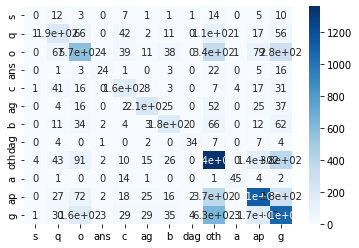

In [74]:
compare_mm_preds('GLOVE', glove_model_list)

Calculating accuracy for split0


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split1


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split2


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split3


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Calculating accuracy for split4


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: 

[0.595395475276474, 0.46261912821137224, 0.6383567765614693, 0.5501383412758518, 0.39123917986801765]
[0.5534168693675138, 0.3871699276116228, 0.41514585394867326, 0.4560900094346796, 0.2883099993743173]
[0.6096774193548387, 0.5607476635514018, 0.6112372304199774, 0.5539772727272727, 0.500804289544236]
Creating confusion matrix
AxesSubplot(0.125,0.125;0.62x0.755)


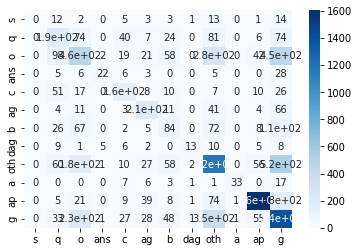

In [76]:
compare_mm_preds('BERT', bert_model_list)

In [78]:
# Aggregate bert multimodal results
bert_prec = [0.595395475276474, 0.46261912821137224, 0.6383567765614693, 0.5501383412758518, 0.39123917986801765]
bert_rec = [0.5534168693675138, 0.3871699276116228, 0.41514585394867326, 0.4560900094346796, 0.2883099993743173]
bert_acc = [0.6096774193548387, 0.5607476635514018, 0.6112372304199774, 0.5539772727272727, 0.500804289544236]
print(np.average(bert_prec))
print(np.average(bert_rec))
print(np.average(bert_acc))

0.527549780238637
0.4200265319473614
0.5672887751195453


In [79]:
glove_prec = [0.5710135880388253, 0.5236639274832785, 0.6619673039315396, 0.5478171224935889, 0.5148281832671748]
glove_rec = [0.5277011565686383, 0.4650378585009809, 0.47615149489341957, 0.4437163033358809, 0.49392591730659263]
glove_acc = [0.528110599078341, 0.508521165475536, 0.5845629965947786, 0.5017045454545455, 0.5345844504021448]
print(np.average(glove_prec))
print(np.average(glove_rec))
print(np.average(glove_acc))

0.5638580250428814
0.48130654612110246
0.5314967514010691
